In [25]:
"These are the libraries for my model"

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [26]:
"path my train and test on colab"
train = '/content/train1.csv'
test = '/content/test.csv'

In [27]:
"read a some or rows to make sure that the is corrected"
df = pd.read_csv(train)
head_for_five_row = df.head()
print("show Rows : \n" , head_for_five_row )

show Rows : 
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [28]:
"define the column for training my model in regression"

col_for_train = df[['LotArea' , 'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' ,'HalfBath' ,'BedroomAbvGr']]
"nine of rows"
col_for_train.head(9)

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,8450,1,0,2,1,3
1,9600,0,1,2,0,3
2,11250,1,0,2,1,3
3,9550,1,0,1,0,3
4,14260,1,0,2,1,4
5,14115,1,0,1,1,1
6,10084,1,0,2,0,3
7,10382,1,0,2,1,3
8,6120,0,0,2,0,2


In [29]:
df_train = pd.read_csv(train)
df_train = df_train.dropna(inplace=True)
df_train = df.copy()

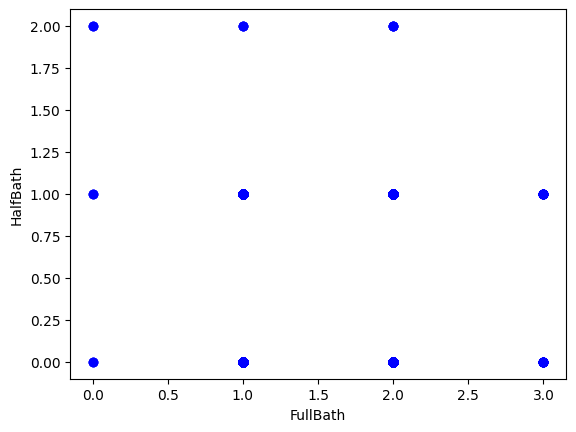

In [30]:
"this is the Scatter digram for FullBath and HalfBath and distrebuting to this data... "

plt.scatter(col_for_train.FullBath , col_for_train.HalfBath ,  color='blue')
plt.xlabel("FullBath")
plt.ylabel("HalfBath")
plt.show()

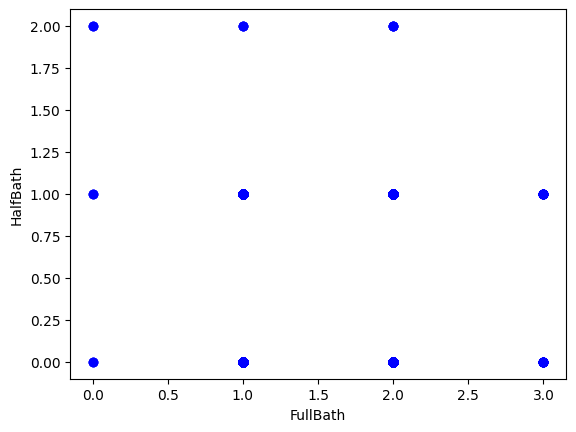

In [31]:
"and this from data in diractly after pre-processing"

plt.scatter(df_train.FullBath, df_train.HalfBath,  color='blue')
plt.xlabel("FullBath")
plt.ylabel("HalfBath")
plt.show()

In [32]:
"we use the Linear regression model to train my data and denpned on number of bedrooms and bathrooms for bsmt and above"

from sklearn import linear_model
model_regr = linear_model.LinearRegression()
x = np.asanyarray(col_for_train)
y = np.asanyarray(df.SalePrice)
model_regr.fit (x, y)
# The coefficients
print ('Coefficients: ', model_regr.coef_)

Coefficients:  [ 1.26385600e+00  3.69428234e+04  1.57815038e+04  7.96968505e+04
  3.63790217e+04 -6.77755507e+03]


In [33]:
"we pre-processing to this data .."

df_test = pd.read_csv(test)
df_test = df_test.dropna(inplace=True)
df_test = df.copy()


In [34]:
"we test the data in this chapter ... "
y_hat= model_regr.predict(df_test[['LotArea' ,'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr',  ]])
x = np.asanyarray(df_test[['LotArea' , 'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' ,'HalfBath' ,'BedroomAbvGr']])
y = np.asanyarray(df_test.SalePrice)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_regr.score(x, y))

Residual sum of squares: 3408883183.47
Variance score: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [38]:
"new value to predicate the price of houses"
new_x = [11500,1,0,2,1,2]
new_x = np.asanyarray(new_x)

In [37]:
"we completable the values with array and input to my model ... "

new_x = new_x.reshape(1,-1)

prediction = model_regr.predict(new_x)

print("the price of house is : " , prediction)

the price of house is :  [198751.40218308]
